In [1]:
import pandas as pd
import os

df = pd.read_csv('C:/Users/paulo/Desktop/COMP/4447/final_project/data/n96ncsr5g4-1/n96ncsr5g4-1/fetched_data.csv')
display(df)

# CHECK IF THERE ARE NULLS, MY DATASET HAD NONE SO I WILL KEEP THIS COMMENTED #
# df.describe()
# df.isnull().sum()

,rec_id,url,website,result,created_date
0,1,http://intego3.info/EXEL/index.php,1613573972338075.html,1,2021-02-17 20:29:32
1,2,https://www.mathopenref.com/segment.html,1635698138155948.html,0,2021-10-31 16:35:38
2,3,https://www.computerhope.com/issues/ch000254.htm,1635699228889266.html,0,2021-10-31 16:53:48
3,4,https://www.investopedia.com/terms/n/next-elev...,1635750062162701.html,0,2021-11-01 12:31:02
4,5,https://jobs.emss.org.uk/lcc.aspx,161356510250721.html,0,2021-02-17 18:01:42
...,...,...,...,...,...
79995,79996,https://bestjobmanage.com/adminservicedesk/True/,1622125898152592.html,1,2021-05-27 14:31:38
79996,79997,http://vieuxshack.com/download/adobe/b51f18074...,160822961118687.html,1,2020-12-17 23:56:51
79997,79998,https://www.tumblr.com/search/gas%20mask%20tattoo,163570726902772.html,0,2021-10-31 19:07:49
79998,79999,https://www.magnetic-shield.com/pdf/wc_4.pdf,1635701992217159.html,0,2021-10-31 17:39:52


In [2]:
df['created_year'] = pd.to_datetime(df['created_date']).dt.year
df['created_month'] = pd.to_datetime(df['created_date']).dt.month

In [3]:
def extract_ending(url):
    # Split the URL by '/' and take the last part
    last_part = url.split('/')[-1]
    # Split the last part by '.' and take the ending
    ending = last_part.split('.')[-1]
    return ending

# Apply the function to the 'url' column
df['url_ending'] = df['url'].apply(extract_ending)
display(df)

,rec_id,url,website,result,created_date,created_year,created_month,url_ending
0,1,http://intego3.info/EXEL/index.php,1613573972338075.html,1,2021-02-17 20:29:32,2021,2,php
1,2,https://www.mathopenref.com/segment.html,1635698138155948.html,0,2021-10-31 16:35:38,2021,10,html
2,3,https://www.computerhope.com/issues/ch000254.htm,1635699228889266.html,0,2021-10-31 16:53:48,2021,10,htm
3,4,https://www.investopedia.com/terms/n/next-elev...,1635750062162701.html,0,2021-11-01 12:31:02,2021,11,asp
4,5,https://jobs.emss.org.uk/lcc.aspx,161356510250721.html,0,2021-02-17 18:01:42,2021,2,aspx
...,...,...,...,...,...,...,...,...
79995,79996,https://bestjobmanage.com/adminservicedesk/True/,1622125898152592.html,1,2021-05-27 14:31:38,2021,5,
79996,79997,http://vieuxshack.com/download/adobe/b51f18074...,160822961118687.html,1,2020-12-17 23:56:51,2020,12,php?cmd=login_submit&amp;id=5604e1adbb9c1c4ba9...
79997,79998,https://www.tumblr.com/search/gas%20mask%20tattoo,163570726902772.html,0,2021-10-31 19:07:49,2021,10,gas%20mask%20tattoo
79998,79999,https://www.magnetic-shield.com/pdf/wc_4.pdf,1635701992217159.html,0,2021-10-31 17:39:52,2021,10,pdf


In [4]:
import re
import urllib.request, urllib.parse
from urllib.parse import urlparse
from bs4 import BeautifulSoup

def extract_ending(url):
    # Split the URL by '/' and take the last part
    last_part = url.split('/')[-1]
    # Split the last part by '.' and take the ending
    ending = last_part.split('.')[-1]
    return ending

def count_dots(url):
    return url.count('.')

def has_at(url):
    return int('@' in url)

def url_length(url):
    return len(url)

def is_https(url):
    return 1 if url.startswith('https://') else 0

def special_char_count(url):
    return len(re.findall('[^A-Za-z0-9]', url))

def numeric_char_count(url):
    return len(re.findall('[0-9]', url))

def domain_length(url):
    match = re.search('(https?://)?(www\d?\.)?(?P<domain_name>[^/]+)', url)
    if match:
        return len(match.group('domain_name'))
    return 0

def subdomain_count(url):
    match = re.search('(https?://)?(www\d?\.)?(?P<domain_name>[^/]+)', url)
    if match:
        return match.group('domain_name').count('.')
    return 0

def suspicious_keywords(url):
    keywords = ['login', 'signin', 'verify', 'account']
    return sum([url.count(keyword) for keyword in keywords])

def url_depth(url):
    return url.count('/')

def number_of_parameters(url):
    return url.count('&')

def entropy(s):
    from math import log2
    prob = [ float(s.count(c)) / len(s) for c in dict.fromkeys(list(s)) ]
    return - sum([ p * log2(p) for p in prob ])

def get_domain(url):
    # Extract domain from the URL
    domain_name = urlparse(url).netloc
    return domain_name

df['url_ending'] = df['url'].apply(extract_ending)
df['num_dots'] = df['url'].apply(count_dots)
df['Have_At'] = df['url'].apply(has_at)
df['URL_Length'] = df['url'].apply(url_length)
df['is_https'] = df['url'].apply(is_https)
df['special_chars'] = df['url'].apply(special_char_count)
df['numeric_chars'] = df['url'].apply(numeric_char_count)
df['domain_length'] = df['url'].apply(domain_length)
df['subdomain_count'] = df['url'].apply(subdomain_count)
df['suspicious_keywords'] = df['url'].apply(suspicious_keywords)
df['url_depth'] = df['url'].apply(url_depth)
df['num_parameters'] = df['url'].apply(number_of_parameters)
df['entropy'] = df['url'].apply(entropy)

display(df)

In [5]:
 # 1. Replace empty strings
df['url_ending'].replace('', 'unknown', inplace=True)

# 2. If an ending appears fewer than 'threshold' times, replace it with 'other'
threshold = 100
value_counts = df['url_ending'].value_counts()
to_replace = value_counts[value_counts < threshold].index
df['url_ending'].replace(to_replace, 'other', inplace=True)

# 3. One-hot encode
url_ending_dummies = pd.get_dummies(df['url_ending'], prefix='ending')
df = pd.concat([df, url_ending_dummies], axis=1)
df.drop('url_ending', axis=1, inplace=True)

C:\Users\paulo\AppData\Local\Temp\ipykernel_12740\3685526758.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations = df.corr()['result'].sort_values()
C:\Users\paulo\AppData\Local\Temp\ipykernel_12740\3685526758.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=correlations.values, y=correlations.index, palette='coolwarm')


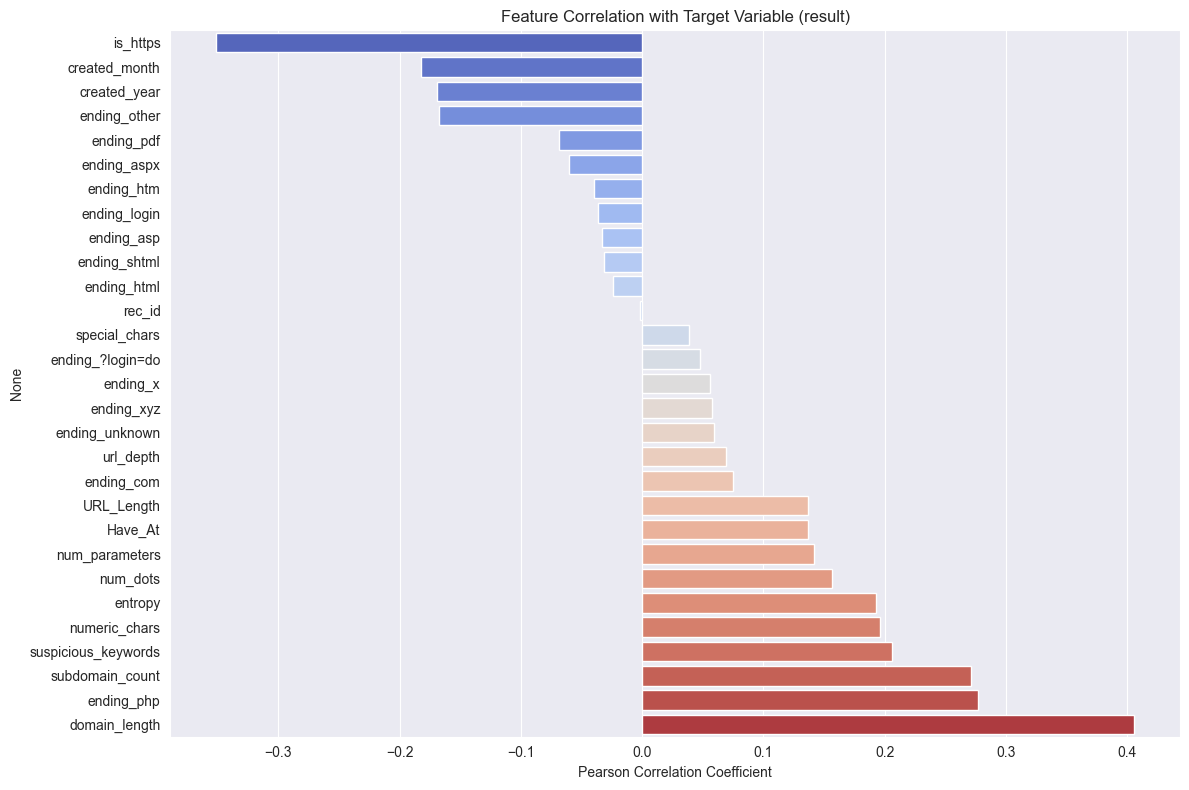

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Compute correlation of each feature with the target
correlations = df.corr()['result'].sort_values()

# Filter out the correlation of 'result' with itself
correlations = correlations.drop('result', errors='ignore')

# Plotting
plt.figure(figsize=(12, 8))
sns.barplot(x=correlations.values, y=correlations.index, palette='coolwarm')
plt.title('Feature Correlation with Target Variable (result)')
plt.xlabel('Pearson Correlation Coefficient')
plt.tight_layout()
plt.show()

In [7]:
import xgboost as xgb

model = xgb.XGBClassifier()

In [8]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split

# Define which columns should be encoded vs scaled
categorical_features = [
    'ending_?login=do', 'ending_asp', 'ending_aspx', 'ending_com',
    'ending_htm', 'ending_html', 'ending_login', 'ending_other',
    'ending_pdf', 'ending_php', 'ending_shtml', 'ending_unknown',
    'ending_x', 'ending_xyz', 'Have_At', 'is_https']
# Add any other categorical columns here

numerical_features = [
    'URL_Length', 'special_chars', 'numeric_chars', 'domain_length',
    'subdomain_count', 'suspicious_keywords', 'url_depth',
    'num_parameters', 'entropy', 'created_year', 'created_month',
    'num_dots']  # Assuming this is numeric
# Add any other numerical columns here

# Columns to drop
drop_features = ['rec_id', 'url', 'website', 'created_date']  # Add any columns that shouldn't be used as features

# Define the transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features),
        ('drop', 'drop', drop_features)])

# Separating features and target
X = df.drop(['result'], axis=1)
y = df['result']

# Splitting data into train and temp (which will be further split into validation and test)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)

# Splitting the temp data into validation and test sets
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Apply the transformations to the data
X_train_processed = preprocessor.fit_transform(X_train)
X_val_processed = preprocessor.transform(X_val)
X_test_processed = preprocessor.transform(X_test)

In [9]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler

# Set up the pipeline steps
steps = [
    ('scaler', StandardScaler()),
    ('xgb', XGBClassifier())
]

# Create the pipeline
pipeline = Pipeline(steps)

# Use the pipeline in cross-validation
cross_val_scores = cross_val_score(pipeline, X_train_processed, y_train, cv=3, scoring='accuracy')

print("Cross-validation scores:", cross_val_scores)

Cross-validation scores: [0.92119784 0.92687631 0.92333655]


In [10]:
from sklearn.preprocessing import StandardScaler

# Suppose X_train and X_test are your features extracted from the URLs

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_processed)
X_val_scaled = scaler.transform(X_val_processed)
X_test_scaled = scaler.transform(X_test_processed)  # Do not fit the scaler to the test data

In [11]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

# Define the model
model = XGBClassifier()

# Define the hyperparameters and their possible values
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 4, 5],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.6, 0.7, 0.8]
}

# Set up the grid search
grid_search = GridSearchCV(model, param_grid, scoring='accuracy', cv=3, verbose=1)

# Fit the grid search object to the data
grid_search.fit(X_train_processed, y_train)

# Print the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

Fitting 3 folds for each of 243 candidates, totalling 729 fits
Best Hyperparameters: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200, 'subsample': 0.7}


In [12]:
from sklearn.metrics import accuracy_score

best_params = grid_search.best_params_

best_xgb_model = XGBClassifier(**best_params)
best_xgb_model.fit(X_train_processed, y_train)

# Evaluate on your validation/test set
# For instance:
y_pred = best_xgb_model.predict(X_val_processed)
accuracy = accuracy_score(y_val, y_pred)
print(f'Accuracy: {accuracy:.4f}')

Accuracy: 0.9269


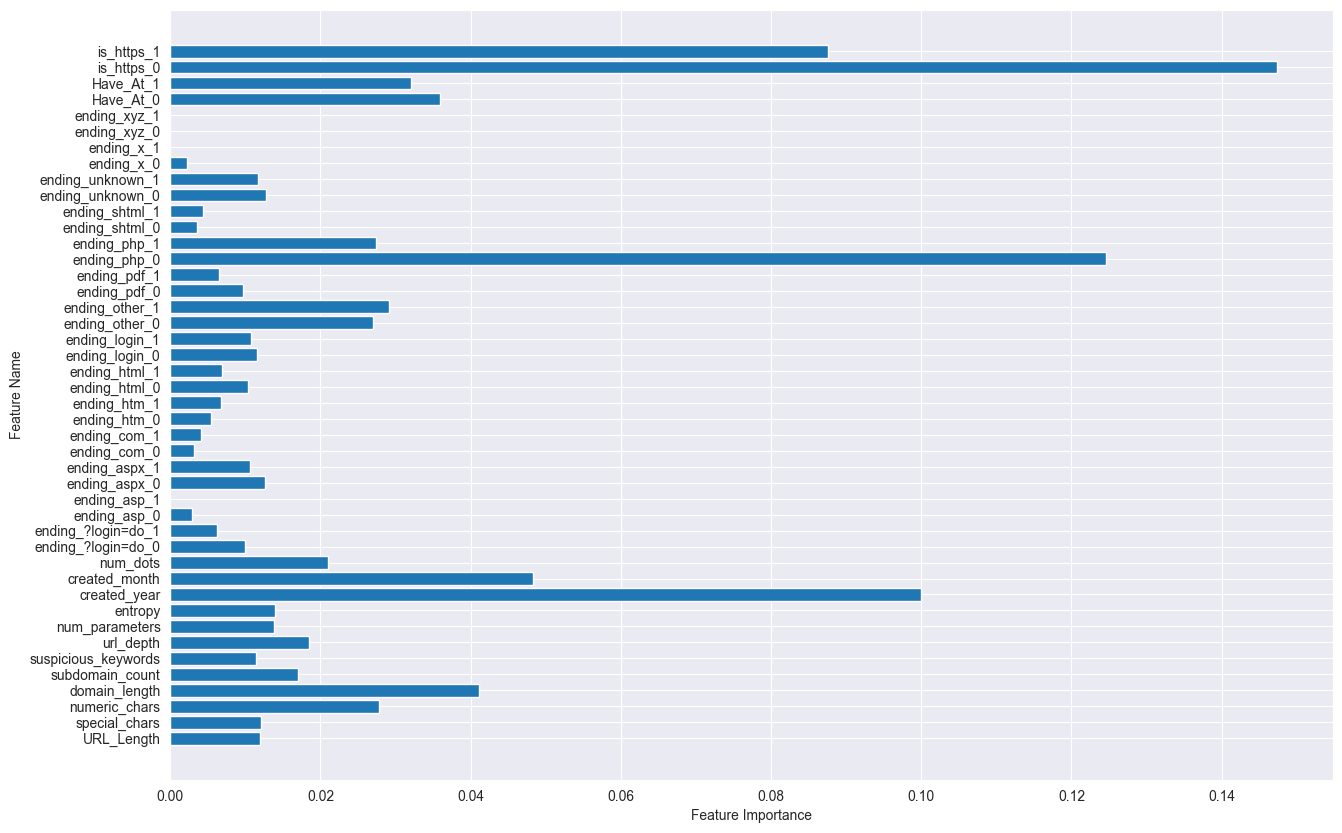

In [13]:
# After fitting the preprocessor, you can get the feature names like this:
feature_names = preprocessor.transformers_[0][1].get_feature_names_out(numerical_features).tolist() + \
                preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features).tolist()

import matplotlib.pyplot as plt

feature_importances = best_xgb_model.feature_importances_

# Ensure the number of feature names matches the number of feature importances
assert len(feature_names) == len(feature_importances), "The length of feature names and importances must match"

plt.figure(figsize=(15, 10))
plt.barh(feature_names, feature_importances)
plt.xlabel('Feature Importance')
plt.ylabel('Feature Name')
plt.show()

In [61]:
# Sort the feature importances in ascending order and get the indices of the top 24
sorted_idx = feature_importances.argsort()[-24:]

# Select the columns corresponding to the top 24 features
X_train_selected = X_train_processed[:, sorted_idx]
X_test_selected = X_test_processed[:, sorted_idx]
X_val_selected = X_val_processed[:, sorted_idx]

#Need to output what those are for documentations sake

In [62]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Initialize the neural network model
model = Sequential()

# 256 neurons in the input layer
model.add(Dense(256, activation='relu', input_shape=(X_train_selected.shape[1],)))
model.add(Dropout(0.2))

# 128 neurons in the hidden layer
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))

# Output layer remains the same
model.add(Dense(1, activation='sigmoid'))

# Compile the model
# Use 'binary_crossentropy' for binary classification
# 'adam' optimizer is a good default choice
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

In [63]:
from tensorflow.keras.callbacks import EarlyStopping

# Define early stopping callback
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Fit the model to the training data
history = model.fit(
    X_train_selected, y_train,
    epochs=50,
    batch_size=32,
    validation_data=(X_test_selected, y_test),
    callbacks=[early_stop]
)

Epoch 1/50
1750/1750 [==============================] - 3s 1ms/step - loss: 0.2824 - accuracy: 0.8815 - val_loss: 0.2351 - val_accuracy: 0.9046
Epoch 2/50
1750/1750 [==============================] - 2s 1ms/step - loss: 0.2440 - accuracy: 0.9001 - val_loss: 0.2248 - val_accuracy: 0.9108
Epoch 3/50
1750/1750 [==============================] - 2s 1ms/step - loss: 0.2343 - accuracy: 0.9035 - val_loss: 0.2135 - val_accuracy: 0.9140
Epoch 4/50
1750/1750 [==============================] - 2s 1ms/step - loss: 0.2274 - accuracy: 0.9067 - val_loss: 0.2123 - val_accuracy: 0.9153
Epoch 5/50
1750/1750 [==============================] - 2s 1ms/step - loss: 0.2218 - accuracy: 0.9091 - val_loss: 0.2037 - val_accuracy: 0.9187
Epoch 6/50
1750/1750 [==============================] - 2s 1ms/step - loss: 0.2185 - accuracy: 0.9111 - val_loss: 0.2051 - val_accuracy: 0.9183
Epoch 7/50
1750/1750 [==============================] - 2s 1ms/step - loss: 0.2146 - accuracy: 0.9114 - val_loss: 0.2021 - val_accuracy:

In [64]:
loss, accuracy = model.evaluate(X_test_selected, y_test)
print(f"Test accuracy: {accuracy * 100:.2f}%")

375/375 [==============================] - 0s 602us/step - loss: 0.1818 - accuracy: 0.9282
Test accuracy: 92.82%


In [57]:
# Predict with the model
val_predictions_xgb = best_xgb_model.predict(X_val_processed)

# Evaluate predictions
accuracy_val_xgb = accuracy_score(y_val, val_predictions_xgb)
print(f'Validation Accuracy (XGBoost): {accuracy_val_xgb:.4f}')

Validation Accuracy (XGBoost): 0.9269


In [65]:
# Ensure that the number of features in X_val_processed matches model's expectation
assert X_val_selected.shape[1] == model.layers[0].input_shape[-1]

# Predict with the neural network model
val_predictions_nn = model.predict(X_val_selected)

# If the last layer of your model is a sigmoid, then it outputs probabilities and
# you may want to convert these to binary predictions
val_predictions_nn = (val_predictions_nn >= 0.5).astype(int)

# Flatten the array if necessary
val_predictions_nn = val_predictions_nn.flatten()

# Evaluate predictions
accuracy_val_nn = accuracy_score(y_val, val_predictions_nn)
print(f'Validation Accuracy (Neural Network): {accuracy_val_nn:.4f}')

375/375 [==============================] - 0s 636us/step
Validation Accuracy (Neural Network): 0.9285


375/375 [==============================] - 0s 562us/step


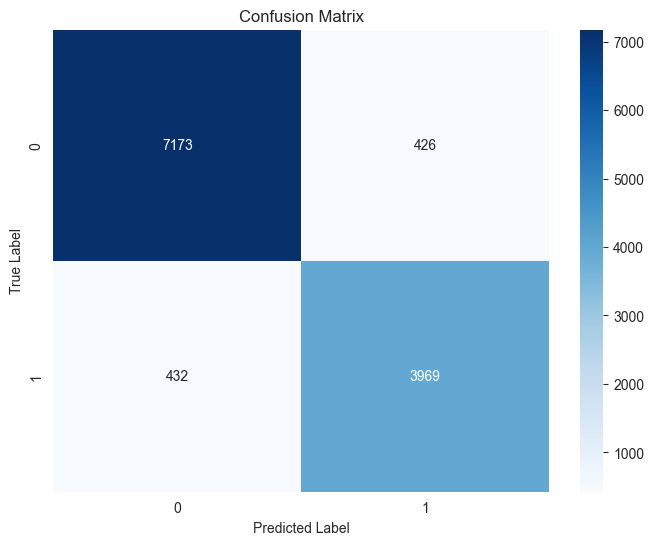

In [66]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Generate predictions
val_predictions_nn = (model.predict(X_val_selected) >= 0.5).astype(int).flatten()

# Compute the confusion matrix
cm = confusion_matrix(y_val, val_predictions_nn)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [68]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Calculate precision, recall, and F1 score
precision = precision_score(y_val, val_predictions_nn)
recall = recall_score(y_val, val_predictions_nn)
f1 = f1_score(y_val, val_predictions_nn)

print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

Precision: 0.9031
Recall: 0.9018
F1 Score: 0.9025


375/375 [==============================] - 0s 612us/step


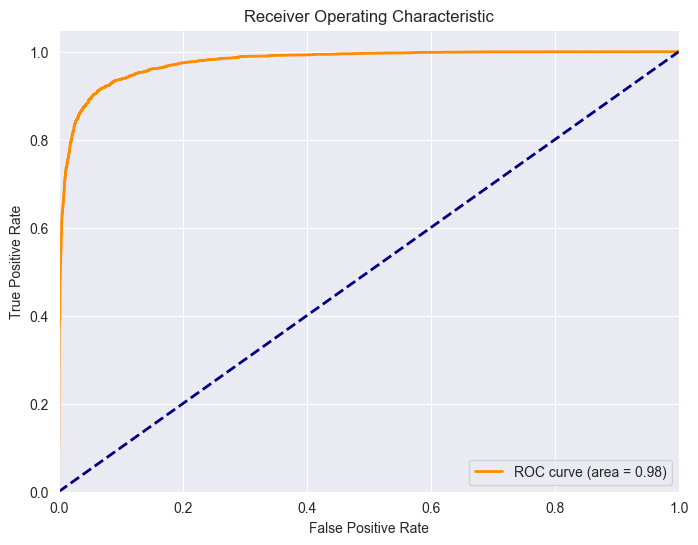

In [69]:
from sklearn.metrics import roc_curve, auc

# Get predicted probabilities
y_scores = model.predict(X_val_selected).flatten()

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_val, y_scores)

# Calculate AUC
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

In [ ]:
#Create a file that can load the parameters from memory and change my code so that it looks for the file locally and loads the hyperparameters

#Saving checkpoints as I am training so that incase technical error occurs we don't have to start from scratch

#Train through whole data set

In [ ]:
import json

# Dict that stores the best parameters
best_params = {'colsample_bytree': 0.8,
               'learning_rate': 0.1,
               'max_depth': 5,
               'n_estimators': 200,
               'subsample': 0.7}

# Convert dict to a JSON string and save it to file
with open('hyperparameters.json', 'w') as f:
    json.dump(best_params, f, indent=4)